# FTIR

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [38]:
data = pd.read_csv('FTIR/1а 2.ascii', comment='#', skiprows=0, sep='\t', header=None)
data.columns = ['freq', 'abs']
data['res'] = 2
data['apod'] = False
data_all = data.copy()

data = pd.read_csv('FTIR/1а 4.ascii', comment='#', skiprows=0, sep='\t', header=None)
data.columns = ['freq', 'abs']
data['res'] = 4
data['apod'] = False
data_all = pd.concat((data_all, data))

data = pd.read_csv('FTIR/1а 1.ascii', comment='#', skiprows=0, sep='\t', header=None)
data.columns = ['freq', 'abs']
data['res'] = 1
data['apod'] = False
data_all = pd.concat((data_all, data))

data = pd.read_csv('FTIR/1а 0.5.ascii', comment='#', skiprows=0, sep='\t', header=None)
data.columns = ['freq', 'abs']
data['res'] = 0.5
data['apod'] = False
data_all = pd.concat((data_all, data))

data = pd.read_csv('FTIR/1б 0.5.ascii', comment='#', skiprows=0, sep='\t', header=None)
data.columns = ['freq', 'abs']
data['res'] = 0.5
data['apod'] = True
data_all = pd.concat((data_all, data))

data = pd.read_csv('FTIR/1б 4.ascii', comment='#', skiprows=0, sep='\t', header=None)
data.columns = ['freq', 'abs']
data['res'] = 4
data['apod'] = True
data_all = pd.concat((data_all, data))

(5000000.0, 20000000.0)

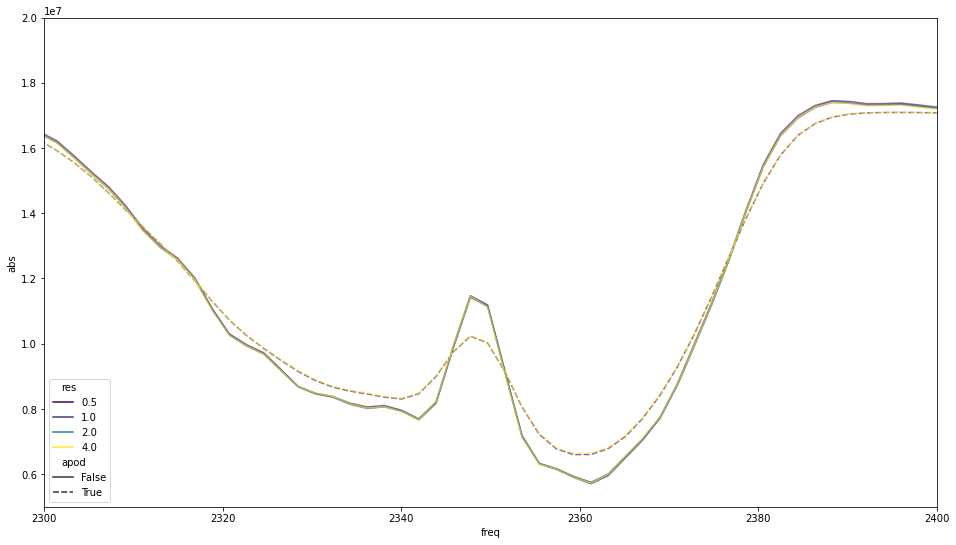

In [90]:
plt.figure(figsize=(16, 9))
sns.lineplot(data=data_all, x='freq', y='abs', hue='res', style='apod', alpha = 0.6, palette='viridis')
plt.xlim(2300, 2400)
plt.ylim(5e6, 20e6)

<AxesSubplot:xlabel='freq', ylabel='abs'>

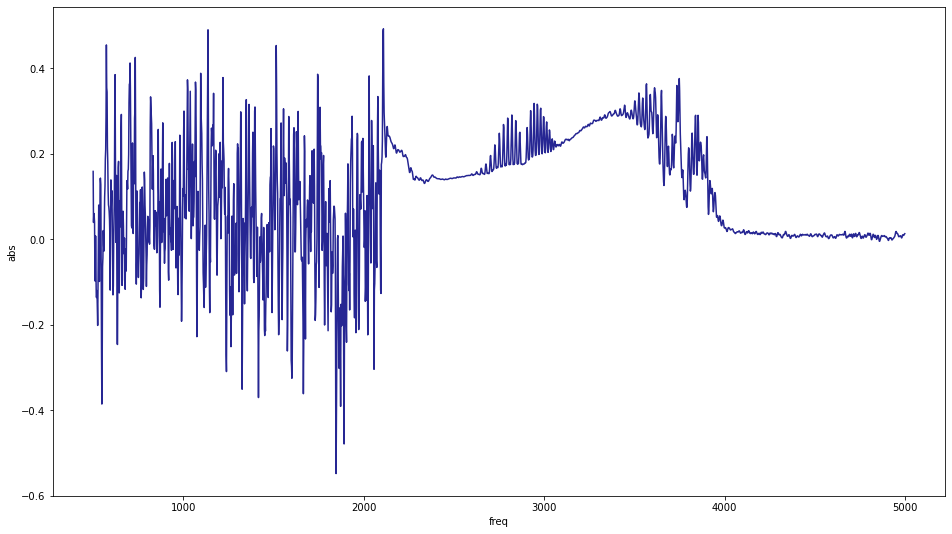

In [151]:
data = pd.read_csv('FTIR/2 empty пустой рабочий (к опорному).ascii', comment='#', skiprows=0, sep='\t', header=None)
data.columns = ['freq', 'abs']

data_hcl = pd.read_csv('FTIR/2 hcl better.ascii', comment='#', skiprows=0, sep='\t', header=None)
data_hcl.columns = ['freq', 'abs']

plt.figure(figsize=(16, 9))
sns.lineplot(data=data_hcl, x='freq', y='abs', alpha = 0.85, color='navy')

<ipython-input-109-b1aeced708d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smaller_data['grounded'] = smaller_data['abs']-(smaller_data['freq']-2600)/(3200-2600)*(0.23 - smaller_data['abs'].min())


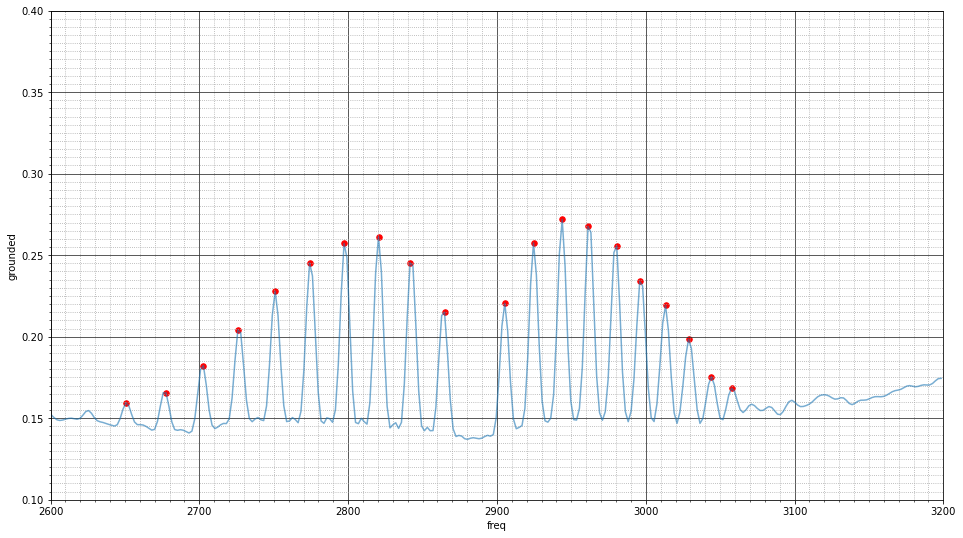

In [109]:
plt.figure(figsize=(16, 9))
smaller_data = data_hcl[(data_hcl['freq'] < 3200) & (data_hcl['freq'] > 2600)]
smaller_data['grounded'] = smaller_data['abs']-(smaller_data['freq']-2600)/(3200-2600)*(0.23 - smaller_data['abs'].min())
# sns.lineplot(data=data, x='freq', y='abs', alpha = 0.6, palette='viridis')
ax = plt.axes()
sns.lineplot(data=smaller_data, x='freq', y='grounded', alpha = 0.6, palette='magma', ax=ax)
plt.xlim(2600, 3200)
plt.ylim(0.1, 0.4)

from matplotlib.ticker import MultipleLocator
plt.grid(which='major', color='#323232', linestyle='-')
plt.grid(which='minor', color='#a4a4a4', linestyle=':')
mlx = MultipleLocator(10)
ax.xaxis.set_minor_locator(mlx)
mly = MultipleLocator(0.005)
ax.yaxis.set_minor_locator(mly)


mins = smaller_data[(smaller_data['abs'].shift(1) > smaller_data['abs']) & (smaller_data['abs'].shift(-1) > smaller_data['abs'])]
maxs = smaller_data[(smaller_data['abs'].shift(1) < smaller_data['abs']) & (smaller_data['abs'].shift(-1) < smaller_data['abs'])]
less_maxs = maxs[(maxs['freq'] > 2620) & (maxs['freq'] < 3065) & (maxs['grounded'] > 0.155)]
plt.scatter(less_maxs['freq'], less_maxs['grounded'], s=30, color='red')
Rs = less_maxs[less_maxs['freq'] > 2900]
Ps = less_maxs[less_maxs['freq'] < 2900][::-1]

In [118]:
Rs['j'] = np.arange(0, 10)
Ps['j'] = np.arange(1, 11)

Rs_d = {int(a[3]): a[0] for a in Rs.to_numpy()}
Ps_d = {int(a[3]): a[0] for a in Ps.to_numpy()}

<ipython-input-118-05e94304269e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rs['j'] = np.arange(0, 10)


10.06223852516227 10.369939804384622


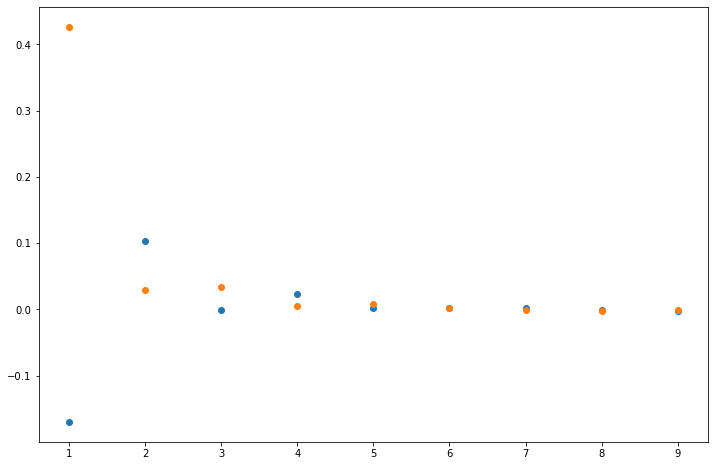

In [131]:
F = []
for j in range(1, 10):
    one = Rs_d[j] - Ps_d[j]
    two = Rs_d[j-1] - Ps_d[j+1]
    F.append((j, one, two))
F = pd.DataFrame(F, columns=('j', 'one', 'two'))
plt.figure(figsize=(12, 8))
# plt.scatter(F['j'], F['one'])
# plt.scatter(F['j'], F['two'])

from scipy.optimize import curve_fit
f = lambda j, B: 4*B*(j + 0.5) # - 8*D*(j+0.5)**3
popt1, pcov1 = curve_fit(f, F['j'], F['one'])
popt2, pcov2 = curve_fit(f, F['j'], F['two'])

xs = np.linspace(0, 11)
ys1 = f(xs, *popt1)
ys2 = f(xs, *popt2)
# plt.plot(xs, ys1)
# plt.plot(xs, ys2)

plt.scatter(F['j'], (F['one'] - f(F['j'], *popt1))/(F['j']+0.5)**3)
plt.scatter(F['j'], (F['two'] - f(F['j'], *popt2))/(F['j']+0.5)**3)

print(*popt1, *popt2)

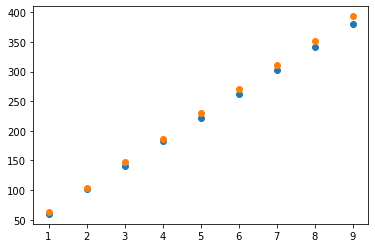

In [152]:
plt.scatter(F['j'], F['one'])
plt.scatter(F['j'], F['two'])

<AxesSubplot:xlabel='freq', ylabel='abs'>

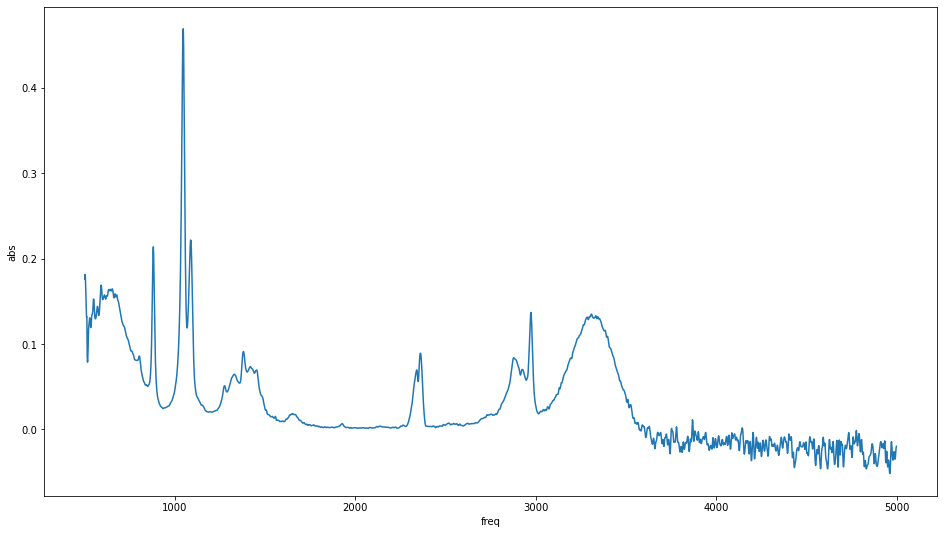

In [132]:
data = pd.read_csv('FTIR/3 atr этанол попытка 2.ascii.ascii', comment='#', skiprows=0, sep='\t', header=None)
data.columns = ['freq', 'abs']
plt.figure(figsize=(16, 9))
sns.lineplot(data=data, x='freq', y='abs', palette='viridis')
# plt.xlim(2300, 2400)
# plt.ylim(5e6, 20e6)

<AxesSubplot:xlabel='freq', ylabel='abs'>

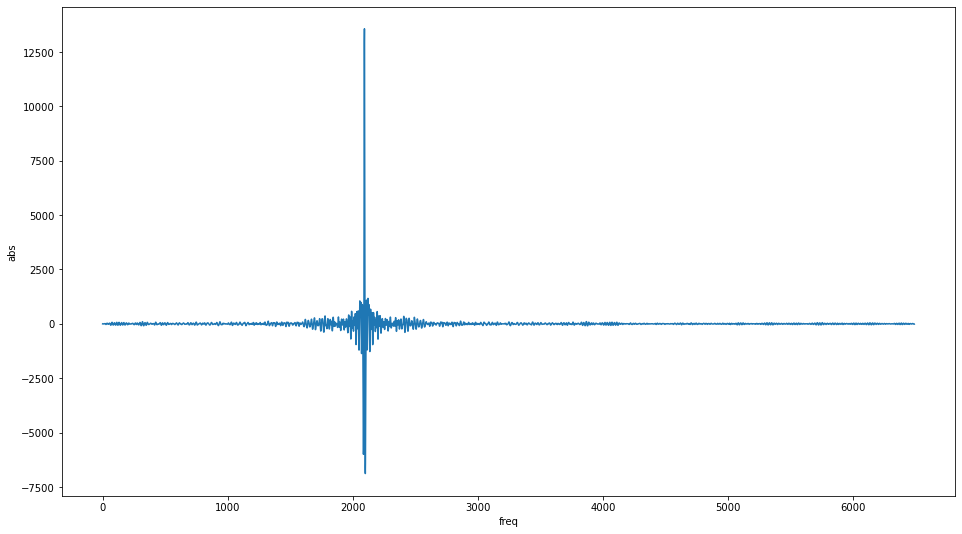

In [139]:
A = ('FTIR/4 пленка спектр относительно воздуха.ascii', 'FTIR/4 плёнка интерферограмма.ascii')

data = pd.read_csv(A[1], comment='#', skiprows=0, sep='\t', header=None)
data.columns = ['freq', 'abs']
plt.figure(figsize=(16, 9))
sns.lineplot(data=data, x='freq', y='abs', palette='viridis')
# plt.xlim(2000, 2300)